In [3]:
from scipy.sparse import csr_matrix, load_npz
from typing import List, Tuple, Dict, Any
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import random
import time
import zarr

In [4]:
partition = np.load('../data/ds1_cluster_ids.npy')
partition = partition - 1
graph_csr = load_npz('../data/ds1_graph.npz')
print(graph_csr.shape)
print(graph_csr.nnz)

(7072, 7072)
77792


In [5]:
num_features = 10000
ram_size_allocated = 1*1024*1024 # (1MB)
num_rows = ram_size_allocated // (num_features*8) # 8 for int64
# feature_matrix = zarr.open('../data/ds1_features.zarr', mode='a', chunks=(num_rows, num_features), dtype='i4')
feature_matrix = zarr.open('../data/ds1_features.zarr', mode='a', chunks=(num_rows, num_features), dtype='i4')
feature_matrix.info

Type               : zarr.core.Array
Data type          : int64
Shape              : (7072, 10)
Chunk shape        : (3536, 10)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 565760 (552.5K)
No. bytes stored   : 73249 (71.5K)
Storage ratio      : 7.7
Chunks initialized : 2/2

In [6]:
print(f'Num of Chunks: {feature_matrix.nchunks}')
print(f'Chunk Shape: {feature_matrix.chunks}')

Num of Chunks: 2
Chunk Shape: (3536, 10)


In [7]:
for i in range(512):
    try:
        block = feature_matrix.get_block_selection(i)
        print(block.shape)
    except:
        print('error', i)
        break

(3536, 10)
(3536, 10)
error 2


In [8]:
z = zarr.array(np.arange(100).reshape(10, 10), chunks=(3,3))
z.info

Type               : zarr.core.Array
Data type          : int64
Shape              : (10, 10)
Chunk shape        : (3, 3)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.KVStore
No. bytes          : 800
No. bytes stored   : 1741 (1.7K)
Storage ratio      : 0.5
Chunks initialized : 16/16

In [9]:
for i in range(500):
    try:
        print(z.get_block_selection(i), end='\n\n')
    except:
        print('error', i)
        break

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]

[[30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]

[[60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]]

[[90 91 92 93 94 95 96 97 98 99]]

error 4


In [10]:
z = zarr.zeros((1000, 1000), chunks=(100, 100), dtype='f4')
z.info

Type               : zarr.core.Array
Data type          : float32
Shape              : (1000, 1000)
Chunk shape        : (100, 100)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.KVStore
No. bytes          : 4000000 (3.8M)
No. bytes stored   : 343
Storage ratio      : 11661.8
Chunks initialized : 0/100

In [11]:
(3536*10*8)/(1024*1024)

0.269775390625

In [12]:
feature_matrix.info

Type               : zarr.core.Array
Data type          : int64
Shape              : (7072, 10)
Chunk shape        : (3536, 10)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 565760 (552.5K)
No. bytes stored   : 73249 (71.5K)
Storage ratio      : 7.7
Chunks initialized : 2/2

In [13]:
partition.shape
# Each node in graph as a corresponding partition ID and a feature vector of length 10

(7072,)

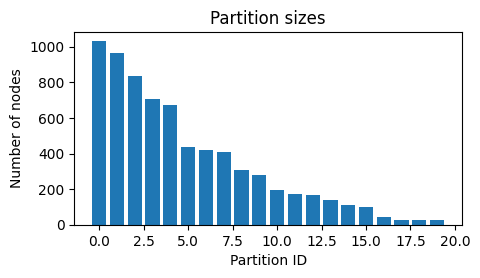

In [14]:
partition_counts = np.bincount(partition)
# bar plot of partition sizes
plt.figure(figsize=(5, 2.5))
plt.bar(range(len(partition_counts)), partition_counts)
plt.xlabel('Partition ID')
plt.ylabel('Number of nodes')
plt.title('Partition sizes')
plt.show()

In [15]:
graph_csr.data, graph_csr.indices, graph_csr.indptr

(array([0.35597926, 1.        , 0.35834667, ..., 0.44340366, 0.41571364,
        0.62979734]),
 array([  18,  242, 1431, ..., 5377, 6657, 7052], dtype=int32),
 array([    0,    11,    22, ..., 77770, 77781, 77792], dtype=int32))

In [16]:
partition.min(), partition.max()

(0, 19)

In [17]:
graph = nx.from_scipy_sparse_array(graph_csr)

In [18]:
# Graph Data
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())
print("Density:", nx.density(graph))
print("Number of connected components:", nx.number_connected_components(graph))
print("First 10 edge weights:", list(graph.edges(data=True))[:10])

Number of nodes: 7072
Number of edges: 58327
Density: 0.0023327948391588613
Number of connected components: 1
First 10 edge weights: [(0, 18, {'weight': 0.3559792637825012}), (0, 242, {'weight': 1.0}), (0, 1431, {'weight': 0.3583466708660126}), (0, 3179, {'weight': 0.49503839015960693}), (0, 3656, {'weight': 0.46911823749542236}), (0, 4840, {'weight': 0.6180887222290039}), (0, 4848, {'weight': 0.46416306495666504}), (0, 5547, {'weight': 0.9761890172958374}), (0, 5926, {'weight': 0.4589651823043823}), (0, 6342, {'weight': 0.45704329013824463})]


In [19]:
node_group_map = dict(zip(range(len(partition)), partition))
nx.set_node_attributes(graph, node_group_map, 'group')

In [20]:
feature_matrix.shape

(7072, 10)

In [21]:
feature_matrix.islice??

Signature: feature_matrix.islice(start=None, end=None)
Source:   
    def islice(self, start=None, end=None):
        """
        Yield a generator for iterating over the entire or parts of the
        array. Uses a cache so chunks only have to be decompressed once.

        Parameters
        ----------
        start : int, optional
            Start index for the generator to start at. Defaults to 0.
        end : int, optional
            End index for the generator to stop at. Defaults to self.shape[0].

        Yields
        ------
        out : generator
            A generator that can be used to iterate over the requested region
            the array.

        Examples
        --------
        Setup a 1-dimensional array::

            >>> import zarr
            >>> import numpy as np
            >>> z = zarr.array(np.arange(100))

        Iterate over part of the array:
            >>> for value in z.islice(25, 30): value;
            25
            26
            27
       

In [22]:
for val in feature_matrix.islice():
    print(val)

[12  2 76 33 80 73 17 18 23 93]
[97 41 77  2 78 62 47 68 83 22]
[67 67 17 70 81 99  3 54 88  9]
[93 47  8 34  9 19 24 66 81 10]
[73 48 95 78  5 90 12 41 42 87]
[ 1  6 21 84 47 71 78 19 48 49]
[66  2 53 27 63 38 46 74 73 84]
[82 23 16 70 10 87 94 79 84  1]
[33 82 90  9 87 40 68 71 75 40]
[60  4 21 94 70 59 45 49 39 22]
[15 93 53 29 21 30 22 45 83 41]
[67 46 98 30 47 66 46 37 59  8]
[71 72  1 39 65 39 37 89 42 37]
[55 62 18 20 82 15 47 61 49 13]
[22 15 90  6 51 10 86 84 94 90]
[98 63 18 15 79 30 71 53 22 90]
[77 62 10  1 47  2 68 96 15 15]
[21 51 73 54 80 10 89 78  7 38]
[62  3  1 72 81 15 27 83 98 64]
[43 98 94 94 73  9 34 21 38 58]
[22 32 37 28 60 73 64 10 74 54]
[54 30 27 68 96 69 93 18 39 74]
[29 26 95 74 20 42  9 50 43 43]
[78 61 27  9 12 17 47 93 43 57]
[46 41 48 42  6  9 47 69 71 23]
[44 75 91 57 28 15 64 73 66 49]
[36 12 32 21  0 73 34 45 64  0]
[97 32 37  1 99 94 82 14 34 37]
[23 45 61 85  3 26 72 51 52 52]
[17 69 79 30  1 61 72 70 15 64]
[90 10 89 58 87 17 67 58 53  5]
[94 91 5

In [23]:
z = zarr.array(np.arange(121).reshape(11, 11), chunks=(3, 3))
z.get_block_selection((1, slice(None)))

array([[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
       [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]])

In [24]:
for i in range(z.shape[0]//z.chunks[0]):
    for j in range(z.shape[1]//z.chunks[1]):
        print(z.get_block_selection((i, j)), end='\n\n')
    print('=======================\n\n')

[[ 0  1  2]
 [11 12 13]
 [22 23 24]]

[[ 3  4  5]
 [14 15 16]
 [25 26 27]]

[[ 6  7  8]
 [17 18 19]
 [28 29 30]]



[[33 34 35]
 [44 45 46]
 [55 56 57]]

[[36 37 38]
 [47 48 49]
 [58 59 60]]

[[39 40 41]
 [50 51 52]
 [61 62 63]]



[[66 67 68]
 [77 78 79]
 [88 89 90]]

[[69 70 71]
 [80 81 82]
 [91 92 93]]

[[72 73 74]
 [83 84 85]
 [94 95 96]]





In [25]:
for i in range(z.shape[0]//z.chunks[0] + 1):
    for j in range(z.shape[1]//z.chunks[1] + 1):
        print(z.get_block_selection((i, j)), end='\n\n')
    print('=======================\n\n')

[[ 0  1  2]
 [11 12 13]
 [22 23 24]]

[[ 3  4  5]
 [14 15 16]
 [25 26 27]]

[[ 6  7  8]
 [17 18 19]
 [28 29 30]]

[[ 9 10]
 [20 21]
 [31 32]]



[[33 34 35]
 [44 45 46]
 [55 56 57]]

[[36 37 38]
 [47 48 49]
 [58 59 60]]

[[39 40 41]
 [50 51 52]
 [61 62 63]]

[[42 43]
 [53 54]
 [64 65]]



[[66 67 68]
 [77 78 79]
 [88 89 90]]

[[69 70 71]
 [80 81 82]
 [91 92 93]]

[[72 73 74]
 [83 84 85]
 [94 95 96]]

[[75 76]
 [86 87]
 [97 98]]



[[ 99 100 101]
 [110 111 112]]

[[102 103 104]
 [113 114 115]]

[[105 106 107]
 [116 117 118]]

[[108 109]
 [119 120]]





# Scoring

In [47]:
chunk_size=1000
n, f = feature_matrix.shape
total_ranks = None
num_chunks = (n + chunk_size - 1) // chunk_size
for i in range(num_chunks):
    start = i * chunk_size
    end = min(n, (i+1) * chunk_size)
    print(f'Processing chunk {i+1}/{num_chunks} with {end-start} nodes')
    chunk = feature_matrix[start:end, :] # get chunk of feature matrix
    chunk_df = pd.DataFrame(chunk) # convert to pandas dataframe
    chunk_ranks = chunk_df.rank(method='dense', ascending=False) # rank the chunk -- dense ranking with descending order; rank 1 is the highest number
    group_chunk = pd.Series(partition[start:end])

    chunk_ranks_grouped = chunk_ranks.groupby(group_chunk).sum()
    # Check if chunk_ranks_grouped has all the partitions, if not add the missing ones and assign 0
    missing_partitions = set(partition) - set(chunk_ranks_grouped.index)

    if missing_partitions:
        for p in missing_partitions:
            chunk_ranks_grouped.loc[p] = 0
    if total_ranks is None:
        total_ranks = chunk_ranks_grouped
    else:
        total_ranks += chunk_ranks_grouped
        
mean_ranks = total_ranks / n
score = mean_ranks.reindex(set(partition))
score = score / score.sum() # Normalize the scores

Processing chunk 1/8 with 1000 nodes
Processing chunk 2/8 with 1000 nodes
Processing chunk 3/8 with 1000 nodes
Processing chunk 4/8 with 1000 nodes
Processing chunk 5/8 with 1000 nodes
Processing chunk 6/8 with 1000 nodes
Processing chunk 7/8 with 1000 nodes
Processing chunk 8/8 with 72 nodes


In [56]:
group_chunk

0      2
1      7
2      0
3      0
4     14
      ..
67    16
68     7
69     1
70     5
71     2
Length: 72, dtype: int16

In [55]:
total_ranks

0        1        2        3        4        5        6        7  \
0   51651.0  50792.0  52436.0  52253.0  51139.0  50810.0  52341.0  51244.0   
1   48176.0  47278.0  48978.0  49828.0  47612.0  48722.0  46382.0  49811.0   
2   41826.0  42702.0  42239.0  41404.0  41717.0  39761.0  41246.0  43865.0   
3   36936.0  35035.0  35431.0  34805.0  36108.0  34491.0  35657.0  36324.0   
4   34488.0  33719.0  33498.0  33247.0  34865.0  34175.0  35141.0  34634.0   
5   21163.0  21932.0  21736.0  22021.0  20306.0  21831.0  21517.0  22199.0   
6   21265.0  20854.0  21906.0  21952.0  20462.0  21726.0  21994.0  21453.0   
7   20831.0  19987.0  20756.0  20477.0  19900.0  19854.0  20736.0  20606.0   
8   14995.0  15218.0  15458.0  15919.0  16024.0  15766.0  14778.0  14290.0   
9   14983.0  13877.0  14074.0  13680.0  14045.0  14188.0  13813.0  13845.0   
10  10909.0   9250.0  10168.0   9784.0  10014.0   9850.0   9877.0   9427.0   
11   8592.0   8565.0   9013.0   8539.0   8381.0   8365.0   9019.0   8809.0   
12   7843.0   8326.0   8823.0   8138.0   8023.0   8667.0   7877.0   8635.0   
13   7331.0   6991.0   7558.0   7289.0   6737.0   7571.0   7328.0   7252.0   
14   5318.0   6190.0   5290.0   5719.0   5724.0   5742.0   5225.0   5843.0   
15   4735.0   4565.0   4464.0   5004.0   5296.0   4714.0   5038.0   5227.0   
16   1971.0   2022.0   2160.0   2148.0   2306.0   2179.0   1847.0   1999.0   
17   1385.0   1303.0   1295.0   1596.0   1175.0   1279.0   1144.0   1332.0   
18   1250.0   1164.0    984.0   1413.0   1383.0   1326.0   1269.0   1375.0   
19   1246.0   1106.0   1342.0   1195.0   1427.0   1221.0   1397.0    958.0   

          8        9  
0   52899.0  50269.0  
1   48047.0  47373.0  
2   41430.0  42602.0  
3   35840.0  34695.0  
4   33955.0  33165.0  
5   21483.0  21595.0  
6   20169.0  21315.0  
7   20848.0  21099.0  
8   14953.0  15543.0  
9   14693.0  14492.0  
10   9182.0  10449.0  
11   9013.0   8961.0  
12   8815.0   8335.0  
13   7195.0   7058.0  
14   5540.0   5684.0  
15   5095.0   5203.0  
16   2391.0   1660.0  
17   1146.0   1426.0  
18   1007.0   1245.0  
19   1080.0   1437.0

In [49]:
scores = pd.DataFrame(score)
scores

0         1         2         3         4         5         6  \
0   0.144724  0.144758  0.146629  0.146609  0.145016  0.144249  0.148012   
1   0.134987  0.134743  0.136960  0.139805  0.135014  0.138321  0.131161   
2   0.117194  0.121701  0.118115  0.116169  0.118298  0.112881  0.116637   
3   0.103493  0.099850  0.099077  0.097654  0.102392  0.097920  0.100833   
4   0.096634  0.096099  0.093672  0.093283  0.098867  0.097022  0.099373   
5   0.059298  0.062506  0.060781  0.061785  0.057582  0.061978  0.060847   
6   0.059584  0.059434  0.061257  0.061592  0.058025  0.061680  0.062196   
7   0.058367  0.056963  0.058041  0.057453  0.056431  0.056365  0.058638   
8   0.042015  0.043371  0.043226  0.044665  0.045440  0.044760  0.041790   
9   0.041982  0.039550  0.039356  0.038383  0.039828  0.040280  0.039061   
10  0.030566  0.026363  0.028433  0.027451  0.028397  0.027964  0.027931   
11  0.024074  0.024410  0.025204  0.023958  0.023766  0.023748  0.025504   
12  0.021976  0.023729  0.024672  0.022833  0.022751  0.024606  0.022275   
13  0.020541  0.019924  0.021135  0.020451  0.019104  0.021494  0.020722   
14  0.014901  0.017642  0.014793  0.016046  0.016232  0.016301  0.014775   
15  0.013267  0.013010  0.012483  0.014040  0.015018  0.013383  0.014247   
16  0.005523  0.005763  0.006040  0.006027  0.006539  0.006186  0.005223   
17  0.003881  0.003714  0.003621  0.004478  0.003332  0.003631  0.003235   
18  0.003502  0.003317  0.002752  0.003965  0.003922  0.003765  0.003589   
19  0.003491  0.003152  0.003753  0.003353  0.004047  0.003466  0.003951   

           7         8         9  
0   0.142690  0.149103  0.142161  
1   0.138700  0.135427  0.133971  
2   0.122143  0.116776  0.120479  
3   0.101145  0.101020  0.098118  
4   0.096439  0.095707  0.093791  
5   0.061814  0.060553  0.061071  
6   0.059736  0.056849  0.060279  
7   0.057378  0.058763  0.059668  
8   0.039791  0.042147  0.043956  
9   0.038552  0.041414  0.040983  
10  0.026250  0.025881  0.029550  
11  0.024529  0.025404  0.025342  
12  0.024044  0.024846  0.023571  
13  0.020193  0.020280  0.019960  
14  0.016270  0.015615  0.016074  
15  0.014555  0.014361  0.014714  
16  0.005566  0.006739  0.004694  
17  0.003709  0.003230  0.004033  
18  0.003829  0.002838  0.003521  
19  0.002668  0.003044  0.004064

<Axes: >

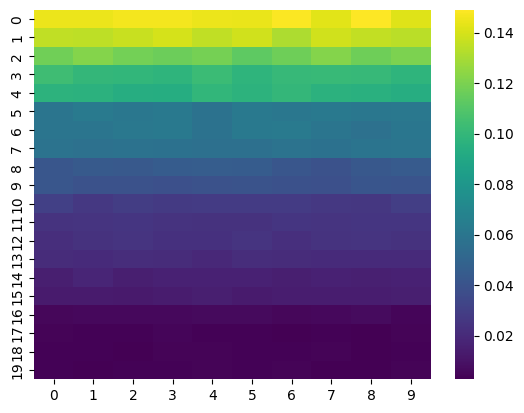

In [215]:
sns.heatmap(scores, cmap='viridis') # righjt now group 0 more as it has more nodes

In [253]:
groups = set(partition)
groups
sim_matrix = {g: {h: 0 for h in groups} for g in groups}
# Add self-relationships
for g in groups:
    sim_matrix[g][g] = 1  # or any other appropriate value

In [255]:
len(partition)

7072

In [270]:
feature_matrix_np = feature_matrix[...]

In [273]:
import sys
print(sys.getsizeof(feature_matrix))
print(sys.getsizeof(feature_matrix_np))

48
565888


In [261]:
for u, v, data in graph.edges(data=True):
    # If the edge references a node not in the partition, skip it
    if u >= len(partition) or v >= len(partition):
        print(f"Warning: Edge ({u}, {v}) references a node not in the partition.")
        continue
    print(u, v)
    print(partition[u], partition[v])
    print(data)
    print(data.get('weight', 1))
    
    # Assign the edge weight to the similarity between the groups
    g_u, g_v = partition[u], partition[v]
    sim_matrix[g_u][g_v] += data.get('weight', 0)
    sim_matrix[g_v][g_u] += data.get('weight', 0)

0 18
1 1
{'weight': 0.3559792637825012}
0.3559792637825012
0 242
1 1
{'weight': 1.0}
1.0
0 1431
1 1
{'weight': 0.3583466708660126}
0.3583466708660126
0 3179
1 1
{'weight': 0.49503839015960693}
0.49503839015960693
0 3656
1 1
{'weight': 0.46911823749542236}
0.46911823749542236
0 4840
1 1
{'weight': 0.6180887222290039}
0.6180887222290039
0 4848
1 1
{'weight': 0.46416306495666504}
0.46416306495666504
0 5547
1 1
{'weight': 0.9761890172958374}
0.9761890172958374
0 5926
1 1
{'weight': 0.4589651823043823}
0.4589651823043823
0 6342
1 1
{'weight': 0.45704329013824463}
0.45704329013824463
0 6427
1 1
{'weight': 0.5362144708633423}
0.5362144708633423
1 242
1 1
{'weight': 0.3490957021713257}
0.3490957021713257
1 1930
1 1
{'weight': 0.4171821177005768}
0.4171821177005768
1 2307
1 1
{'weight': 0.6490623950958252}
0.6490623950958252
1 2470
1 1
{'weight': 0.9639718532562256}
0.9639718532562256
1 3471
1 1
{'weight': 0.9857146143913269}
0.9857146143913269
1 3656
1 1
{'weight': 0.36143651604652405}
0.36143

In [251]:
sim_matrix = pd.DataFrame(sim_matrix)
sim_matrix

0            1            2            3            4   \
0   9201.695655     0.000000   211.864667     0.000000     0.000000   
1      0.000000  8107.746451     0.000000     0.000000   504.535979   
2    211.864667     0.000000  6810.130086     0.000000     0.000000   
3      0.000000     0.000000     0.000000  6353.367353     0.000000   
4      0.000000   504.535979     0.000000     0.000000  5465.584091   
5      0.000000     0.000000     0.000000     0.000000     0.000000   
6      0.000000     0.000000    31.204584    44.932455     0.000000   
7     85.732684     0.000000    30.012653     0.000000     0.000000   
8      0.000000     0.000000   238.241621     0.000000     0.000000   
9      0.418267     0.000000     1.310231     0.000000     0.000000   
10     0.000000     0.000000     0.952958     0.000000     0.000000   
11     0.000000     5.146211     0.000000     0.000000    62.285060   
12     0.000000     0.000000     3.404847    56.427843     0.000000   
13     0.000000    41.558177     0.000000     0.000000    33.966675   
14     0.000000     0.000000     1.765183     0.000000    10.540844   
15    17.821263     0.000000    25.718476     0.000000     0.000000   
16     0.000000     0.000000     0.000000     1.531000     0.000000   
17     0.000000     0.000000     0.000000     0.000000     0.000000   
18     0.000000    11.145627     0.000000     0.000000     8.091406   
19     0.000000     0.000000     0.000000     0.000000     0.000000   

             5            6            7            8            9   \
0      0.000000     0.000000    85.732684     0.000000     0.418267   
1      0.000000     0.000000     0.000000     0.000000     0.000000   
2      0.000000    31.204584    30.012653   238.241621     1.310231   
3      0.000000    44.932455     0.000000     0.000000     0.000000   
4      0.000000     0.000000     0.000000     0.000000     0.000000   
5   3729.320038    53.652700     0.922579    87.949750     0.000000   
6     53.652700  3376.454423    29.782123    54.851266     0.294409   
7      0.922579    29.782123  3530.338687    10.478794     0.000000   
8     87.949750    54.851266    10.478794  2321.277427     0.000000   
9      0.000000     0.294409     0.000000     0.000000  2376.305163   
10     0.000000     0.000000     0.000000     0.000000    37.167736   
11     0.000000     0.000000     0.000000     0.000000     0.000000   
12    17.483568     1.994477     0.000000     2.475522     0.000000   
13     1.205768     0.000000     0.000000     1.795281     0.000000   
14     0.000000     0.000000     0.000000     0.000000     0.000000   
15    15.017884    29.334843    38.548589    13.300722     0.000000   
16     0.000000     5.303883     0.000000     0.000000     0.848726   
17     0.000000     0.000000     0.000000     0.000000     0.000000   
18     0.000000     0.000000     0.000000     0.000000     0.000000   
19     0.000000     0.000000     0.000000     0.000000     0.000000   

             10           11           12           13          14  \
0      0.000000     0.000000     0.000000     0.000000    0.000000   
1      0.000000     5.146211     0.000000    41.558177    0.000000   
2      0.952958     0.000000     3.404847     0.000000    1.765183   
3      0.000000     0.000000    56.427843     0.000000    0.000000   
4      0.000000    62.285060     0.000000    33.966675   10.540844   
5      0.000000     0.000000    17.483568     1.205768    0.000000   
6      0.000000     0.000000     1.994477     0.000000    0.000000   
7      0.000000     0.000000     0.000000     0.000000    0.000000   
8      0.000000     0.000000     2.475522     1.795281    0.000000   
9     37.167736     0.000000     0.000000     0.000000    0.000000   
10  1594.708594     0.000000     0.000000     0.000000    0.000000   
11     0.000000  1364.315284     0.000000     2.133053    6.879552   
12     0.000000     0.000000  1255.297976     0.000000    0.590068   
13     0.000000     2.133053     0.000000  1081.1

In [226]:
sum_deg = {}
for idx, row in sim_matrix.iterrows():
    sum = 0
    for i in range(len(row)):
        if i != idx:
            sum += row[i]
    sum_deg[idx] = sum
    print(f'Row {idx} sum: {sum}')

Row 0 sum: 315.8368809968233
Row 1 sum: 562.3859926760197
Row 2 sum: 544.4752188175917
Row 3 sum: 102.8912985920906
Row 4 sum: 619.4199634343386
Row 5 sum: 176.2322504967451
Row 6 sum: 251.3507398366928
Row 7 sum: 195.47742173075676
Row 8 sum: 409.0929562598467
Row 9 sum: 40.03936901688576
Row 10 sum: 42.222135439515114
Row 11 sum: 77.3638407588005
Row 12 sum: 92.26486118137836
Row 13 sum: 81.0732403844595
Row 14 sum: 22.772831425070763
Row 15 sum: 149.90303055942059
Row 16 sum: 9.510091498494148
Row 17 sum: 0.9937985837459564
Row 18 sum: 20.571286350488663
Row 19 sum: 4.005627349019051


In [227]:
sum_deg_s = pd.Series(sum_deg)
sum_deg_s.sort_values(ascending=False)

4     619.419963
1     562.385993
2     544.475219
8     409.092956
0     315.836881
6     251.350740
7     195.477422
5     176.232250
15    149.903031
3     102.891299
12     92.264861
13     81.073240
11     77.363841
10     42.222135
9      40.039369
14     22.772831
18     20.571286
16      9.510091
19      4.005627
17      0.993799
dtype: float64

In [211]:
adjusted_scores = scores.copy()
for group in adjusted_scores.index:
    for other_group in adjusted_scores.columns:
        if group == other_group:
            continue
        similarity = sim_matrix.loc[group, other_group]
        adjusted_scores.loc[group] += similarity * scores.loc[other_group]
adjusted_scores = adjusted_scores / adjusted_scores.sum()

In [212]:
adjusted_scores

0         1         2         3         4         5         6  \
0   0.095942  0.097877  0.096192  0.094462  0.095478  0.092258  0.095407   
1   0.156377  0.154362  0.151153  0.150132  0.158853  0.156661  0.160385   
2   0.142190  0.142041  0.144102  0.144759  0.143630  0.143631  0.144160   
3   0.008894  0.008795  0.009093  0.009112  0.008606  0.009157  0.009238   
4   0.218147  0.216139  0.220663  0.224637  0.216660  0.223025  0.211454   
5   0.022406  0.022600  0.022969  0.023369  0.022928  0.023488  0.022740   
6   0.049908  0.050113  0.049656  0.049494  0.049623  0.049321  0.049604   
7   0.058382  0.058424  0.059020  0.058751  0.058110  0.058000  0.059329   
8   0.118530  0.121889  0.119579  0.118108  0.117725  0.116044  0.118712   
9   0.000875  0.000880  0.000872  0.000859  0.000866  0.000851  0.000868   
10  0.005446  0.005119  0.005114  0.004977  0.005150  0.005210  0.005076   
11  0.021550  0.021282  0.020934  0.020843  0.021840  0.021633  0.021983   
12  0.024054  0.023466  0.023310  0.023034  0.023624  0.023143  0.023612   
13  0.028977  0.028691  0.028846  0.029113  0.029026  0.029426  0.028700   
14  0.003967  0.003954  0.003861  0.003831  0.004025  0.003952  0.004046   
15  0.035356  0.035487  0.035671  0.035488  0.034899  0.035090  0.035754   
16  0.001649  0.001611  0.001646  0.001637  0.001603  0.001651  0.001667   
17  0.000012  0.000012  0.000012  0.000014  0.000011  0.000012  0.000010   
18  0.007324  0.007247  0.007294  0.007369  0.007332  0.007437  0.007241   
19  0.000011  0.000010  0.000012  0.000011  0.000013  0.000011  0.000013   

           7         8         9  
0   0.098066  0.095714  0.098644  
1   0.154582  0.154775  0.151985  
2   0.137709  0.144919  0.142320  
3   0.008823  0.008487  0.008989  
4   0.221995  0.218703  0.216784  
5   0.021603  0.021964  0.023111  
6   0.049531  0.049744  0.050300  
7   0.057686  0.059250  0.058212  
8   0.121819  0.118016  0.121864  
9   0.000874  0.000874  0.000884  
10  0.004991  0.005358  0.005341  
11  0.021368  0.021362  0.020999  
12  0.023587  0.023650  0.023275  
13  0.029164  0.028920  0.028587  
14  0.003955  0.003933  0.003899  
15  0.035229  0.035408  0.035925  
16  0.001616  0.001592  0.001632  
17  0.000012  0.000010  0.000013  
18  0.007381  0.007309  0.007224  
19  0.000008  0.000010  0.000013

<Axes: >

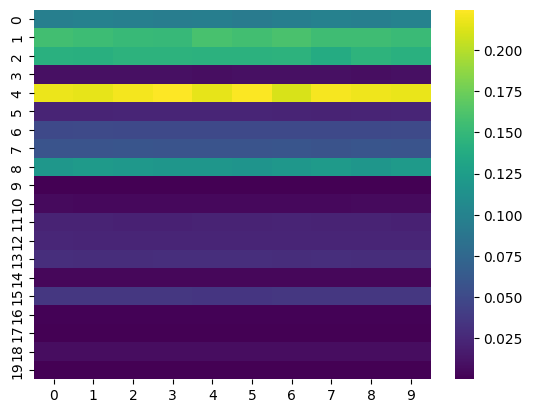

In [217]:
sns.heatmap(adjusted_scores, cmap='viridis') # now group 4 has horizontal line with yellow (high importance)
# Group 4 got more importance as it has more connections with other groups

In [213]:
ranked_features = {}
for group in adjusted_scores.index:
    ranked_features[group] = adjusted_scores.loc[group].sort_values(ascending=False)
ranked_features

{0: 9    0.098644
 7    0.098066
 1    0.097877
 2    0.096192
 0    0.095942
 8    0.095714
 4    0.095478
 6    0.095407
 3    0.094462
 5    0.092258
 Name: 0, dtype: float64,
 1: 6    0.160385
 4    0.158853
 5    0.156661
 0    0.156377
 8    0.154775
 7    0.154582
 1    0.154362
 9    0.151985
 2    0.151153
 3    0.150132
 Name: 1, dtype: float64,
 2: 8    0.144919
 3    0.144759
 6    0.144160
 2    0.144102
 5    0.143631
 4    0.143630
 9    0.142320
 0    0.142190
 1    0.142041
 7    0.137709
 Name: 2, dtype: float64,
 3: 6    0.009238
 5    0.009157
 3    0.009112
 2    0.009093
 9    0.008989
 0    0.008894
 7    0.008823
 1    0.008795
 4    0.008606
 8    0.008487
 Name: 3, dtype: float64,
 4: 3    0.224637
 5    0.223025
 7    0.221995
 2    0.220663
 8    0.218703
 0    0.218147
 9    0.216784
 4    0.216660
 1    0.216139
 6    0.211454
 Name: 4, dtype: float64,
 5: 5    0.023488
 3    0.023369
 9    0.023111
 2    0.022969
 4    0.022928
 6    0.022740
 1    0.0226

In [77]:
total_ranks = None
groups = []
for i in range(10):
    chunk = feature_matrix.get_block_selection(i)
    group = chunk[:, -1].astype(int)
    groups.extend(group)
    features = chunk[:, :-1]
    series = pd.DataFrame(features, columns=[f'feature_{i}' for i in range(features.shape[1])])
    series['group'] = group
    chunk_ranks = series.iloc[:, :-1].rank(method='dense')
    chunk_ranks['group'] = group
    if total_ranks is None:
        total_ranks = chunk_ranks.groupby('group').sum()
    else:
        # WHY GOING NA HERE?
        grps = chunk_ranks.groupby('group').sum()
        # make sure all groups present, assign zero if not
        for grp, grp_data in grps.iterrows():
            if grp not in total_ranks.index:
                total_ranks.loc[grp] = 0
            total_ranks.loc[grp] += grp_data

mean_ranks = total_ranks / len(feature_matrix)
score = mean_ranks.reindex(set(groups))


In [80]:
score

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
group                                                                     
0           0.79       0.66       0.67       0.67       0.70       0.62   
1           0.74       0.75       0.73       0.66       0.58       0.82   
2           0.84       1.03       1.13       1.22       1.26       1.05   
3           1.22       1.51       1.47       1.35       1.26       1.43   
4           1.91       1.55       1.50       1.60       1.70       1.58   

       feature_6  feature_7  feature_8  feature_9  
group                                              
0           0.64       0.77       0.71       0.78  
1           0.64       0.67       0.81       0.84  
2           1.16       0.98       0.93       0.91  
3           1.49       1.47       1.40       1.48  
4           1.57       1.61       1.65       1.49

In [83]:
yum = score / score.sum()
yum # sum per column is one

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
group                                                                     
0       0.143636   0.120000   0.121818   0.121818   0.127273   0.112727   
1       0.134545   0.136364   0.132727   0.120000   0.105455   0.149091   
2       0.152727   0.187273   0.205455   0.221818   0.229091   0.190909   
3       0.221818   0.274545   0.267273   0.245455   0.229091   0.260000   
4       0.347273   0.281818   0.272727   0.290909   0.309091   0.287273   

       feature_6  feature_7  feature_8  feature_9  
group                                              
0       0.116364   0.140000   0.129091   0.141818  
1       0.116364   0.121818   0.147273   0.152727  
2       0.210909   0.178182   0.169091   0.165455  
3       0.270909   0.267273   0.254545   0.269091  
4       0.285455   0.292727   0.300000   0.270909